<a href="https://colab.research.google.com/github/CMDTausif/Pytorch-CNN-CIFAR10/blob/main/Pytorch_CNN_CIFAR10Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

1.10.0+cu111
0.11.1+cu111


In [ ]:
transformer_train = torchvision.transforms.Compose([
                   transforms.RandomCrop(32, padding=4),
                   torchvision.transforms.RandomHorizontalFlip(p=0.5),
                   torchvision.transforms.RandomAffine(0, translate=(0.1, 0.1)),
                   transforms.ToTensor(),                                
])

In [ ]:
## Load the train data
train_dataset = torchvision.datasets.CIFAR10(
                
    root=".",
    train = True,
    transform = transforms.ToTensor(),
    download=True

)

Files already downloaded and verified


In [ ]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [ ]:
## load the test dataset
test_dataset = torchvision.datasets.CIFAR10(
                
    root=".",
    train = False,
    transform = transforms.ToTensor(),
    download=True

)

Files already downloaded and verified


In [ ]:
### number of classes
K = len(set(train_dataset.targets))
print("Number of Classes: ", K)

Number of Classes:  10


In [ ]:
## Dataloader

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size= batch_size, shuffle= False)

In [ ]:
train_dataset_fixed = torchvision.datasets.CIFAR10(
                
    root=".",
    train = True,
    transform = transforms.ToTensor(),
    download=True

)
train_loader_fixed = torch.utils.data.DataLoader(dataset = train_dataset_fixed, batch_size = batch_size, shuffle= False)


Files already downloaded and verified


In [ ]:
# the data transformer mapped the data to (0,1)
# and also moved the color channel before height/width
tmp_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 1, shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.8941, 0.8980, 0.9098,  ..., 0.8549, 0.9216, 0.9451],
          [0.8980, 0.8941, 0.9059,  ..., 0.8118, 0.6667, 0.5882],
          [0.7843, 0.9020, 0.9098,  ..., 0.6784, 0.5490, 0.4588],
          ...,
          [0.6078, 0.6039, 0.6275,  ..., 0.5373, 0.5529, 0.4980],
          [0.6314, 0.6235, 0.6471,  ..., 0.5451, 0.5412, 0.5412],
          [0.5686, 0.5569, 0.5647,  ..., 0.5451, 0.5412, 0.5333]],

         [[0.9451, 0.9451, 0.9451,  ..., 0.9098, 0.9490, 0.9490],
          [0.9490, 0.9373, 0.9373,  ..., 0.8667, 0.7020, 0.6118],
          [0.8392, 0.9490, 0.9412,  ..., 0.7333, 0.5843, 0.4824],
          ...,
          [0.6118, 0.6118, 0.6392,  ..., 0.4863, 0.5059, 0.4667],
          [0.6235, 0.6157, 0.6431,  ..., 0.5020, 0.5020, 0.5137],
          [0.5569, 0.5451, 0.5569,  ..., 0.5333, 0.5294, 0.5255]],

         [[1.0000, 1.0000, 0.9922,  ..., 0.9686, 0.9843, 0.9725],
          [1.0000, 0.9922, 0.9961,  ..., 0.9059, 0.7373, 0.6431],
          [0.8549, 0.9804, 0.9961,  ..., 0

In [ ]:
# define the model
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()

    #define the conv layer
    self.conv1= nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(2),
    )

    self.conv2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2),
    )
    self.conv3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Conv2d(128, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2),
    )

    # define the linear layers
    self.fc1 = nn.Linear(128 * 4 *4, 1024)
    self.fc2 = nn.Linear(1024, K) ## 1024, 10

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)

    # x = x.view(-1, 128 *3 *3) ## -1 -> first dimension, 128*3*3 is the second dimension
    x = x.view(x.size(0), -1)
    ## view is being used for reshaphing x
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x

In [ ]:
# instantiate the model
model = CNN(K)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel

In [ ]:
## Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
## a function o encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    
    for i in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            ## move data to gpu
            inputs, targets = inputs.to(device), targets.to(device)
            
            
            ##zero the parameter gradient
            optimizer.zero_grad()
            
            ## forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            ##backward and optimize
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())    
        ## get the train loss and test loss
        train_loss = np.mean(train_loss) 
        
        test_loss = []
        for inputs, targets in test_loader:
            ## move data to gpu
            inputs, targets = inputs.to(device), targets.to(device)        
            ## forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
         
            test_loss.append(loss.item())    
        test_loss = np.mean(test_loss)
        
        ## saving the losses
        train_losses[i] = train_loss
        test_losses[i] = test_loss
        
        dt = datetime.now() - t0
        print(f'Epoch {i+1}/{epochs}, Train_loss: {train_loss:.4f}, \  Test_loss: {test_loss:.4f}, Duration: {dt}')
        
    return train_losses, test_losses

In [ ]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs= 80)

Epoch 1/80, Train_loss: 1.2402, \  Test_loss: 0.9204, Duration: 0:00:13.443491
Epoch 2/80, Train_loss: 0.8070, \  Test_loss: 0.7716, Duration: 0:00:13.337958
Epoch 3/80, Train_loss: 0.6458, \  Test_loss: 0.6813, Duration: 0:00:13.324496
Epoch 4/80, Train_loss: 0.5503, \  Test_loss: 0.6545, Duration: 0:00:13.358575
Epoch 5/80, Train_loss: 0.4807, \  Test_loss: 0.6377, Duration: 0:00:13.311210
Epoch 6/80, Train_loss: 0.4215, \  Test_loss: 0.6225, Duration: 0:00:13.360027
Epoch 7/80, Train_loss: 0.3656, \  Test_loss: 0.6244, Duration: 0:00:13.321309
Epoch 8/80, Train_loss: 0.3276, \  Test_loss: 0.6277, Duration: 0:00:13.343075
Epoch 9/80, Train_loss: 0.2944, \  Test_loss: 0.6295, Duration: 0:00:13.312138
Epoch 10/80, Train_loss: 0.2547, \  Test_loss: 0.6522, Duration: 0:00:13.338918
Epoch 11/80, Train_loss: 0.2410, \  Test_loss: 0.6369, Duration: 0:00:13.325855
Epoch 12/80, Train_loss: 0.2192, \  Test_loss: 0.7111, Duration: 0:00:13.312761
Epoch 13/80, Train_loss: 0.2079, \  Test_loss: 0.

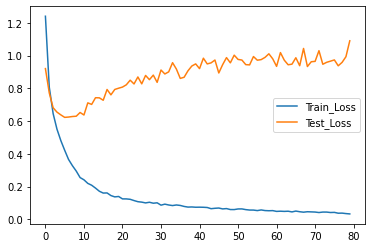

In [ ]:
# plot the train and test loss per iteration
plt.plot(train_losses, label="Train_Loss")
plt.plot(test_losses, label="Test_Loss")
plt.legend()
plt.show()

In [ ]:
## accuracy
n_correct = 0
n_total = 0

for inputs, targets in train_loader:
  ## move data to gpu
  inputs, targets = inputs.to(device), targets.to(device)

  ## forward pass
  outputs = model(inputs)

  ## get the prediction
  ## torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1) 

  ## update the counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
train_acc = n_correct / n_total

n_correct = 0
n_total = 0

for inputs, targets in test_loader:
  ## move data to gpu
  inputs, targets = inputs.to(device), targets.to(device)

  ## forward pass
  outputs = model(inputs)

  ## get the prediction
  ## torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1) 

  ## update the counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total


print(f"Train acc: {train_acc:.4f}, Test_acc: {test_acc:.4f}")

Train acc: 0.9887, Test_acc: 0.8409


In [ ]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion_matrix", cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    Normalization can be applied by normalize=True
    """
    if normalize:
        cm  = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion matrix without normalization")
        
    print(cm)
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = ".2f" if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment = "center",
                color="white" if cm[i,j]>thresh else "black" )
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted Label")
    plt.show()

Confusion matrix without normalization
[[842   9  24  15  16   3   9  10  48  24]
 [ 10 910   3   7   1   1   3   2  15  48]
 [ 41   2 772  37  40  30  52  15   6   5]
 [ 15   2  47 646  60 110  67  30  12  11]
 [ 12   1  40  26 825  15  33  40   7   1]
 [  7   2  37  94  39 759  21  39   1   1]
 [  5   2  26  20  21   3 912   6   5   0]
 [  6   0  13  20  30  32   4 879   3  13]
 [ 23  14   8   8   3   2   4   2 923  13]
 [ 14  50   1   6   0   2   1   5  15 906]]


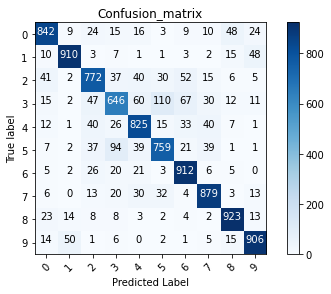

In [ ]:
# get all predictions in an array and plot the confusion matrix
import numpy
x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])

for inputs, targets in test_loader:
    inputs = inputs.to(device)
    targets = targets.to(device)
    
    
    
    #forward pass
    outputs = model(inputs)
    
    #get prediction
    _, predictions = torch.max(outputs, 1)
    
    # update p test
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# label mapping
labels = '''
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck

'''.split()

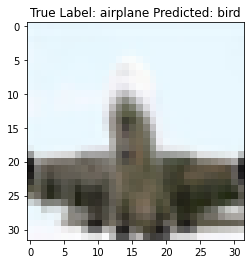

In [ ]:
p_test = p_test.astype(np.uint8)
mis_class_idx = np.where(p_test != y_test)[0]
i = np.random.choice(mis_class_idx)
plt.imshow(x_test[i].reshape(32, 32, 3))
plt.title("True Label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

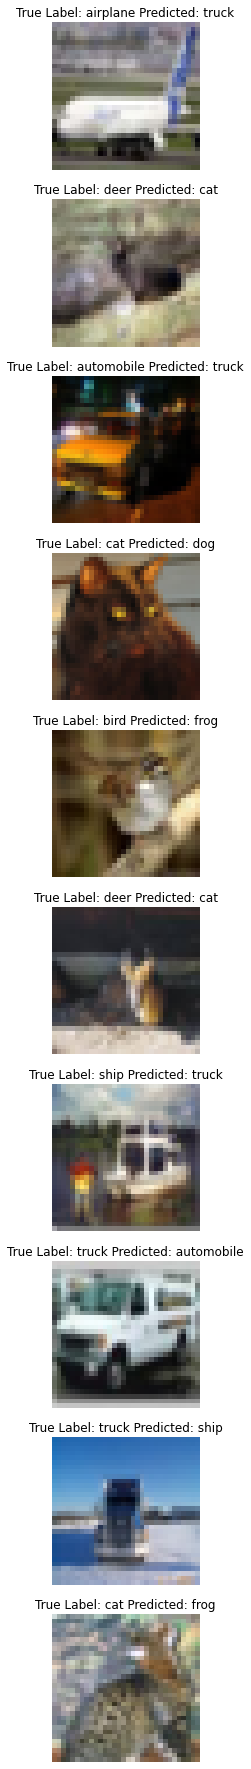

In [ ]:
# show some more misclassified samples
p_test = p_test.astype(np.uint8)
mis_class_idx = np.where(p_test != y_test)[0]
sample_idx = np.random.choice(mis_class_idx, 10, replace=False)
plt.figure(figsize=(32, 32))
for j, i in enumerate(sample_idx):
  plt.subplot(10, 1, j+1)
  plt.axis('off')
  plt.imshow(x_test[i].reshape(32, 32, 3))
  plt.title("True Label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
from torchsummary import summary
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,496
              ReLU-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
        MaxPool2d-14             [-1, 6